<H1> The algorithm predict what the chance of admission is </H1>

Used dataset: https://www.kaggle.com/mohansacharya/graduate-admissions

In [1]:
# Import popular modules
import numpy as np
import pandas as pd

# Data acquisition
import os
import tarfile

np.random.seed(42)

# Data visualization
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
csv_name = 'Graduate_Admission.csv'
df = pd.read_csv(csv_name)

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.rename(columns = {'GRE Score': 'GRE_Score', 'TOEFL Score' : 'TOEFL_Score', 'University Rating' : 'University_Rating', 
                    'Chance of Admit ':'Chance of Admit' }, inplace = True)
df['Chance of Admit'] = df['Chance of Admit'] * 100.00 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,72.17400
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,14.11404
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,34.00000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,63.00000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,72.00000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,82.00000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,97.00000


In [8]:
df.index = df['Serial No.'].values
df.drop('Serial No.', axis = 1, inplace = True)

In [9]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,72.17400
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,14.11404
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,34.00000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,63.00000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,72.00000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,82.00000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,97.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249110144A8>,
      dtype=object)

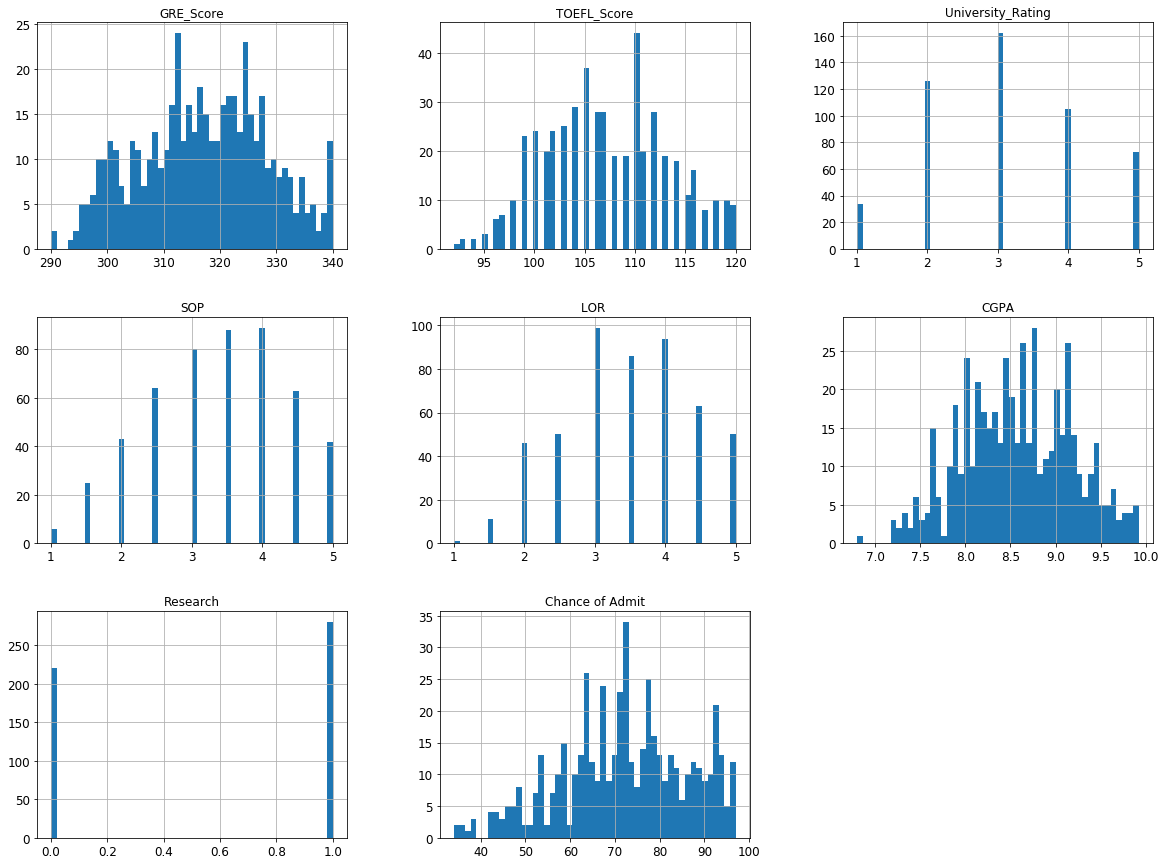

In [10]:
df.hist(bins = 50, figsize = (20,15))

<H1> Correlation </H1>  

In [11]:
corr_matrix = df.corr()

In [12]:
corr_matrix['Chance of Admit'].sort_values(ascending = False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE_Score            0.810351
TOEFL_Score          0.792228
University_Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit, dtype: float64

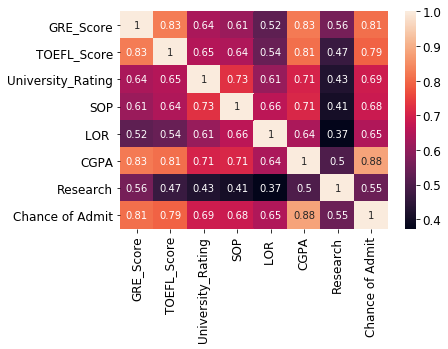

In [13]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)

From above we can notice that there is strong correlation mostly between:
+ <b> TOEFL_Score </b> and <b> GRE_Score </b>    
+ <b> CGPA </b> and <b> GRE_Score </b>  

There is no negative correlated attributes 

In [14]:
from pandas.plotting import scatter_matrix

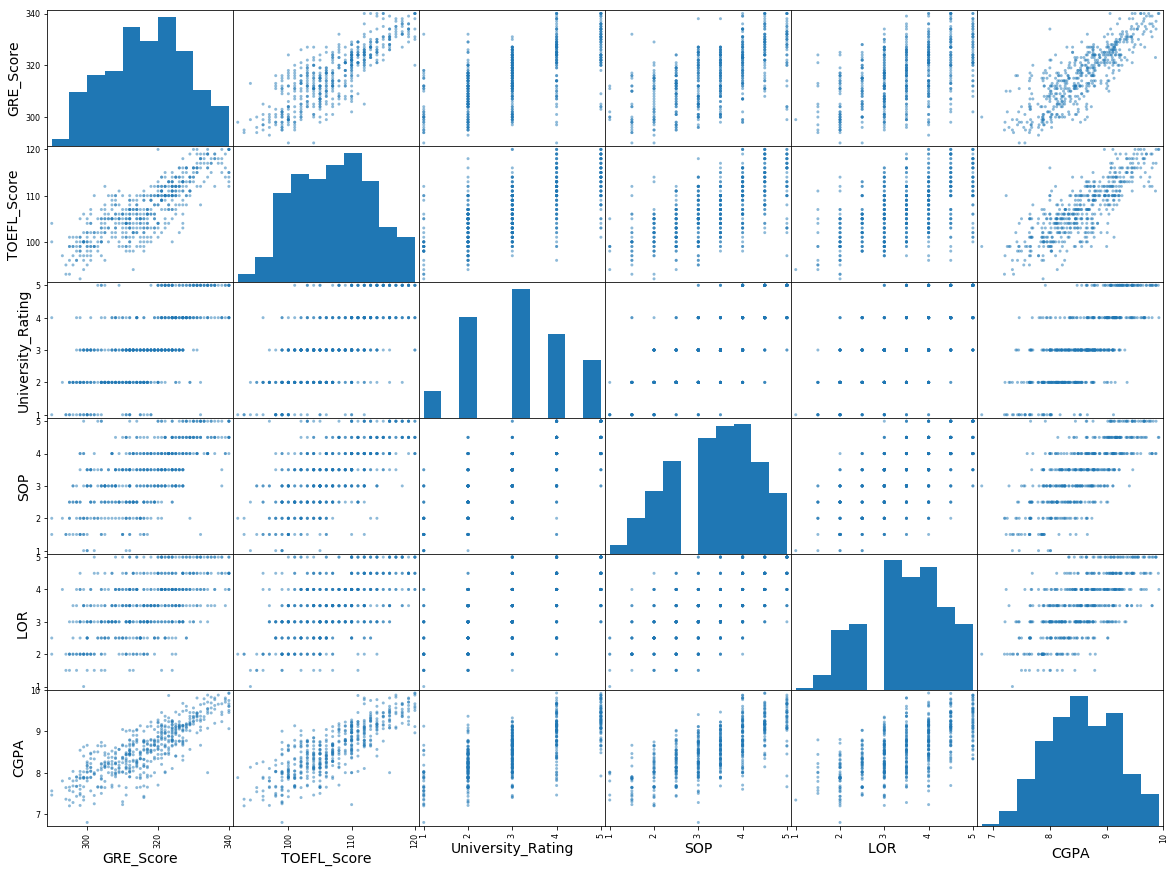

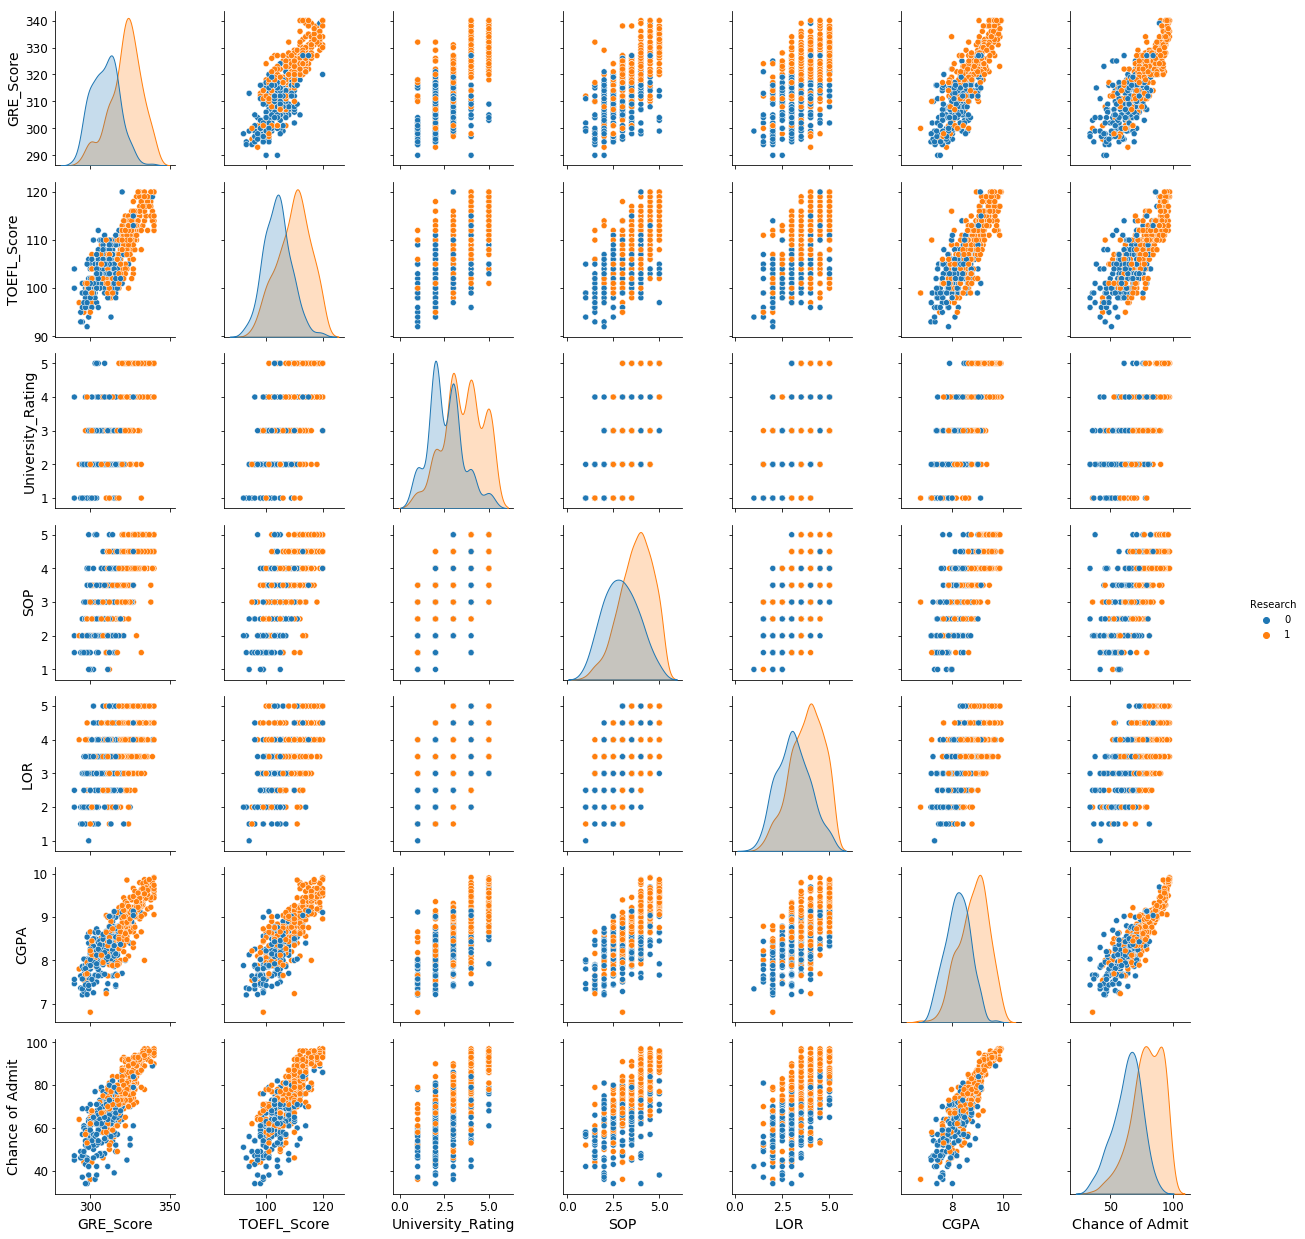

In [15]:
attribs = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA']
scatter_matrix(df[attribs], figsize = (20, 15))

#or another way to show the correlation
sns.pairplot(df, hue='Research')

<H1> Data Preparation </H1>

In [16]:
from sklearn.preprocessing import StandardScaler 

In [17]:
std_scaler = StandardScaler()

In [18]:
std_scaler.fit(df)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
df_scaled = std_scaler.transform(df)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [25]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [27]:
df_scaled.head(20)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
5,1.198882,1.285102,1.650957,1.137360,-0.523513,1.263738,0.886405,1.264263
6,0.401282,0.297575,-0.099793,-0.377773,0.558125,-0.623031,0.886405,0.200427
7,-0.750808,-1.019128,-0.975168,-0.377773,0.558125,-1.119549,-1.128152,-0.296030
8,-1.282541,-0.854540,-1.850542,-1.387862,-2.145970,-0.954043,-1.128152,-1.572633
9,0.578526,0.132987,-0.099793,0.127271,-0.523513,0.038993,-1.128152,-1.927245


<H1> Split set into train and test </H1>

In [23]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_scaled.iloc[:,:-1]
y = df_scaled.iloc[:,-1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [30]:
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (425, 7)
Testing data size: (75, 7)


<H1> Model - Linear Regression </H1>

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [33]:
lin_reg = LinearRegression()

In [34]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
lin_pred = lin_reg.predict(X_test)

In [36]:
mse = metrics.mean_squared_error(y_test, lin_pred)

In [37]:
mse

0.2032205686361345

In [49]:
user_input = [[100, 5, 5, 5, 5, 9.65, 1]] #user input from testing data
user_pred = lin_reg.predict(user_input)
print((user_pred.flatten()).astype(float))

[24.43874004]


<H1> Model - Random Forest </H1>

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
for_regr = RandomForestRegressor(random_state=0)

In [52]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5,6,7],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = for_regr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, scoring="r2")

In [53]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   21.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=2)

<b> Best set of hiperparameters </b>

In [54]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Parameter", "Value"] 

for param, val in grid_search.best_params_.items():
    table.add_row([param, val])

print(table)

+--------------+-------+
|  Parameter   | Value |
+--------------+-------+
|  max_depth   |   7   |
| max_features |  sqrt |
| n_estimators |  500  |
+--------------+-------+


In [55]:
# retrain the model with best parameters
for_regr = RandomForestRegressor(max_depth = grid_search.best_params_['max_depth'], 
                                 max_features = grid_search.best_params_['max_features'], 
                                 n_estimators = grid_search.best_params_['n_estimators'])

In [56]:
for_regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
for_regr_prediction = for_regr.predict(X_test)

In [58]:
fro_regr_mse = metrics.mean_squared_error(y_test, for_regr_prediction)

In [59]:
fro_regr_mse

0.20774338671902798